In [ ]:
# Software Versions used

''' Jupyter - 6.3.0
    Pandas -  1.2.4
    Numpy  -  1.20.1
    Python -  3.8.8
    Scipy  -  1.6.2
    Windows - 10

'''

' Jupyter - 6.3.0\n    Pandas -  1.2.4\n    Numpy  -  1.20.1\n    Python -  3.8.8\n    Scipy  -  1.6.2\n    Windows - 10\n\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import statsmodels.formula.api as smf

# Load the datasets

In [ ]:
redwine_df = pd.read_csv("/content/drive/MyDrive/PSA Red Wine Data Set/winequality_red.csv")
redwine_df.shape

(1599, 12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ensure the path is correct
file_path = "/content/drive/MyDrive/PSA Red Wine Data Set/winequality_red.csv"

# Try reading the file
redwine_df = pd.read_csv(file_path)
redwine_df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1599, 12)

In [ ]:
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Sample Statistics

In [ ]:
# Take mean for all the attributes

sample_means = redwine_df.mean()
sample_standard_deviations = redwine_df.std()

d = {'Sample_mean': sample_means, 'Sample_standard_deviation': sample_standard_deviations}
sample_statistics = pd.DataFrame(data=d)


In [ ]:
sample_statistics

,Sample_mean,Sample_standard_deviation
fixed acidity,8.319637,1.741096
volatile acidity,0.527821,0.179060
citric acid,0.270976,0.194801
residual sugar,2.538806,1.409928
chlorides,0.087467,0.047065
free sulfur dioxide,15.874922,10.460157
total sulfur dioxide,46.467792,32.895324
density,0.996747,0.001887
pH,3.311113,0.154386
sulphates,0.658149,0.169507


# Population parameters



In [ ]:
# Assuming wine dataset is a larger population from which the sample redwine data is taken.

wine_df = pd.read_csv("/content/drive/MyDrive/PSA Red Wine Data Set/winequality_red.csv")


wine_df.shape

(1599, 12)

In [ ]:

pop_means = wine_df.mean()
pop_standard_deviations = wine_df.std()

d = {'Population_mean': pop_means, 'Population_Standard_Deviation': pop_standard_deviations}
pop_parameters = pd.DataFrame(data=d)

In [ ]:
pop_parameters

,Population_mean,Population_Standard_Deviation
fixed acidity,8.292945,1.736537
volatile acidity,0.528914,0.179048
citric acid,0.269706,0.194513
residual sugar,2.534693,1.402006
chlorides,0.087353,0.046968
free sulfur dioxide,16.004908,10.512349
total sulfur dioxide,46.560123,32.988000
density,0.996726,0.001882
pH,3.312227,0.153887
sulphates,0.657748,0.168650


In [ ]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
redwine_df.head(20
                )

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
redwine_df.isna().count()   #none of the records have any null value in any column

,0
fixed acidity,1599
volatile acidity,1599
citric acid,1599
residual sugar,1599
chlorides,1599
free sulfur dioxide,1599
total sulfur dioxide,1599
density,1599
pH,1599
sulphates,1599


In [ ]:
#redwine_df.boxplot()   # Lot of outliers

redwine_df.apply(zscore).boxplot(figsize=(20,10))

NameError: name 'zscore' is not defined

<Axes: >

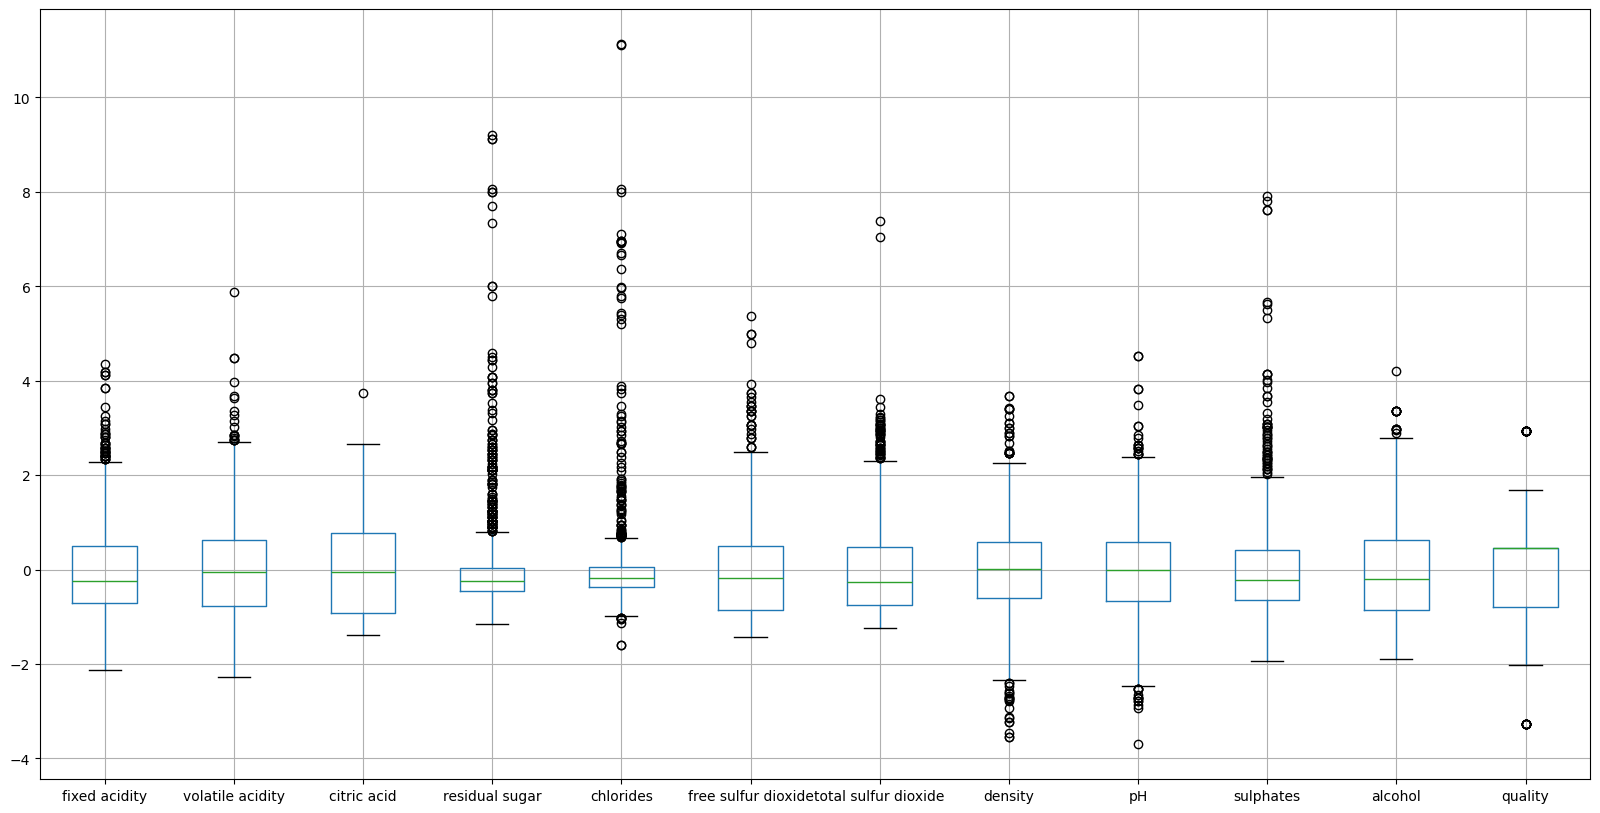

In [ ]:
#redwine_df.boxplot()   # Lot of outliers

# Import zscore if you haven't already
from scipy.stats import zscore

redwine_df.apply(zscore).boxplot(figsize=(20,10))

Correlation Heatmap

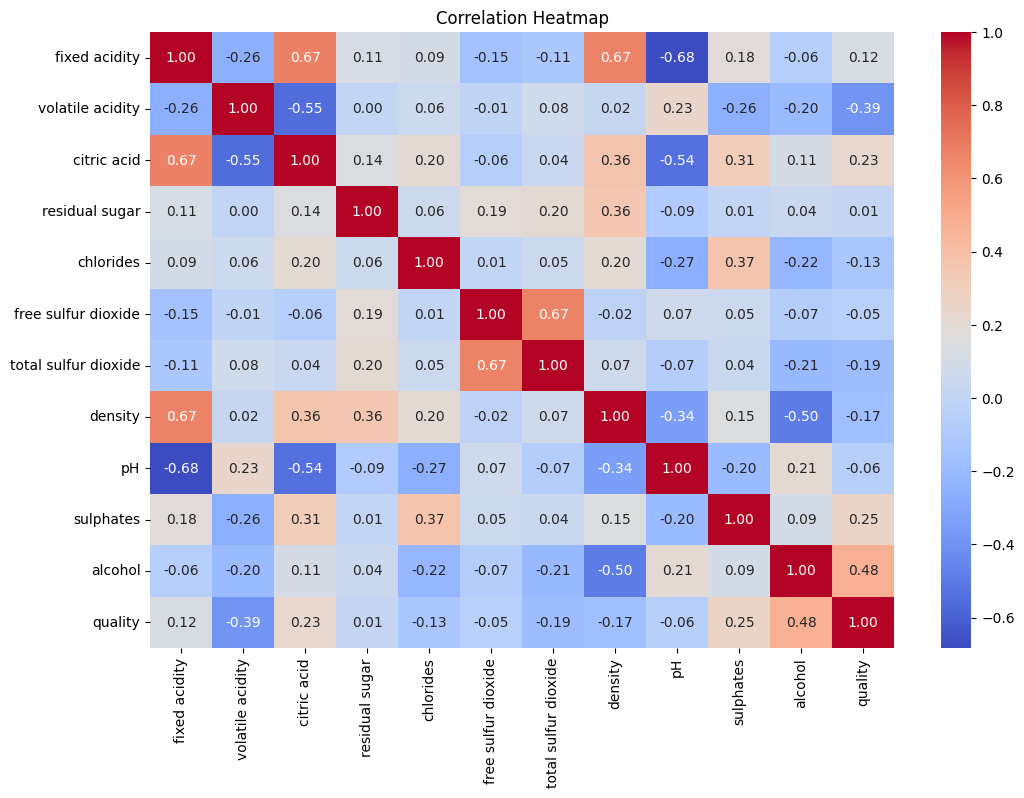

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(redwine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Replace df with redwine_df
plt.title("Correlation Heatmap")
plt.show()

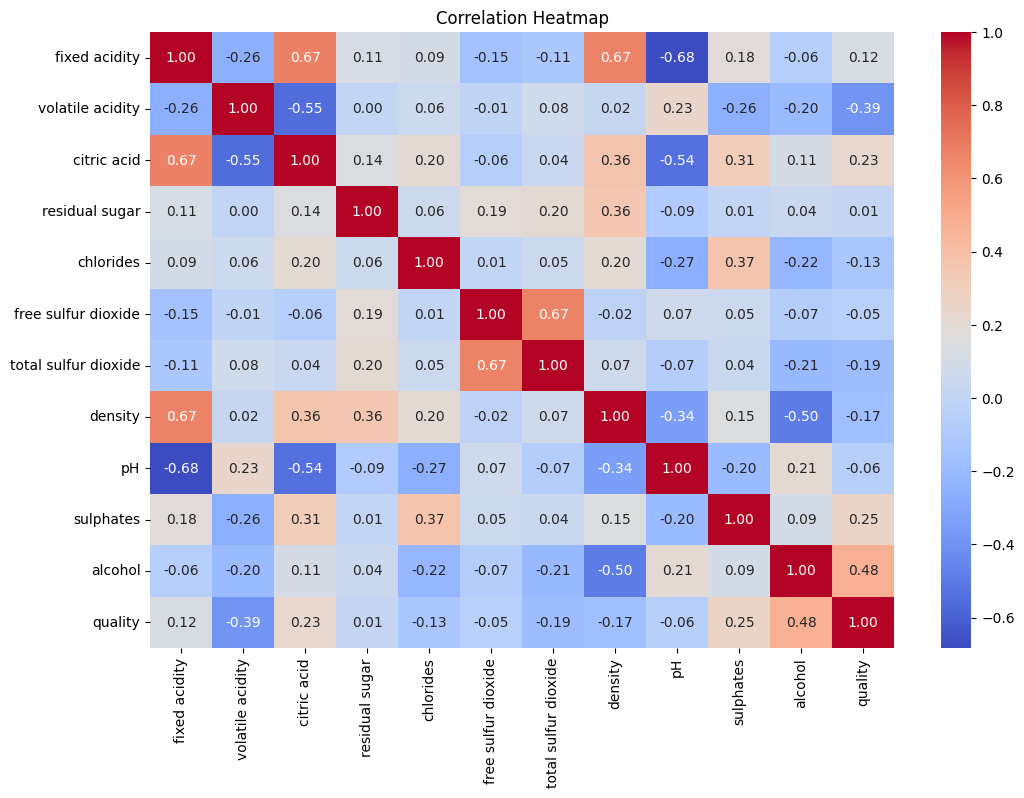

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as 'plt'
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(redwine_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Replace df with redwine_df
plt.title("Correlation Heatmap")
plt.show()

Pairplot or Scatterplots

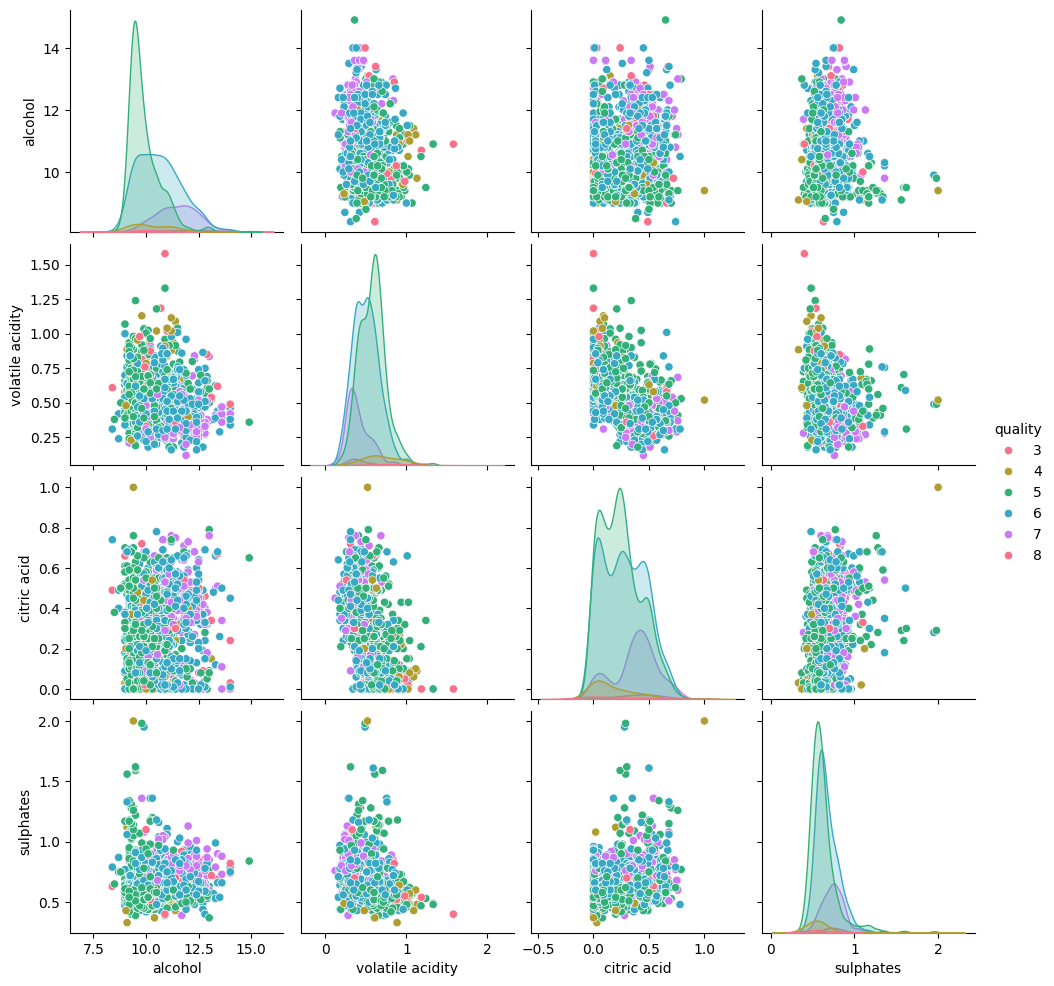

In [ ]:
sns.pairplot(redwine_df, vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates'], hue='quality', palette='husl')

If that’s too heavy, break it down:

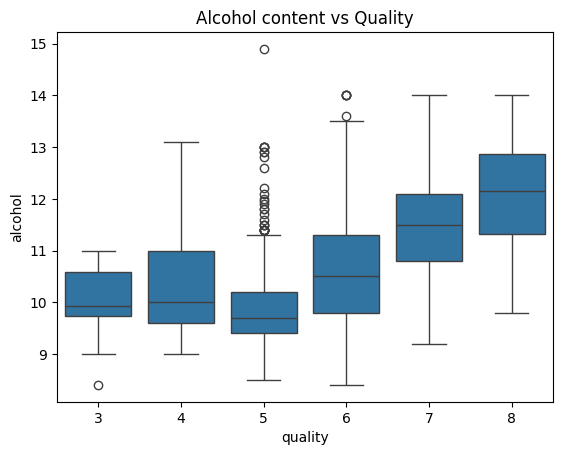

In [ ]:
sns.boxplot(x='quality', y='alcohol', data=redwine_df)  # Changed 'df' to 'redwine_df'
plt.title("Alcohol content vs Quality")
plt.show()

Distribution of Each Feature

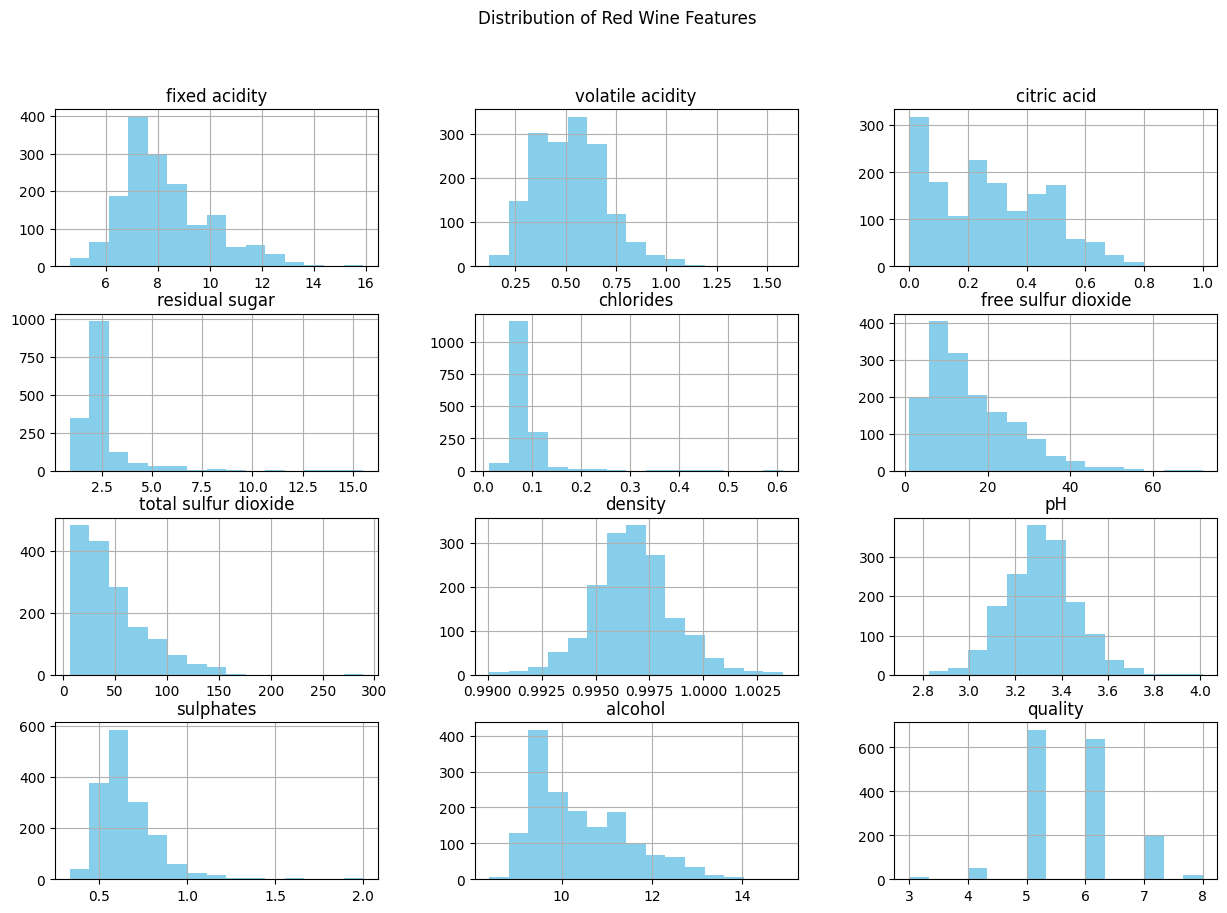

In [ ]:
redwine_df.hist(bins=15, figsize=(15, 10), layout=(4, 3), color='skyblue')  # Changed 'df' to 'redwine_df'
plt.suptitle("Distribution of Red Wine Features")
plt.show()

Grouped Means by Quality

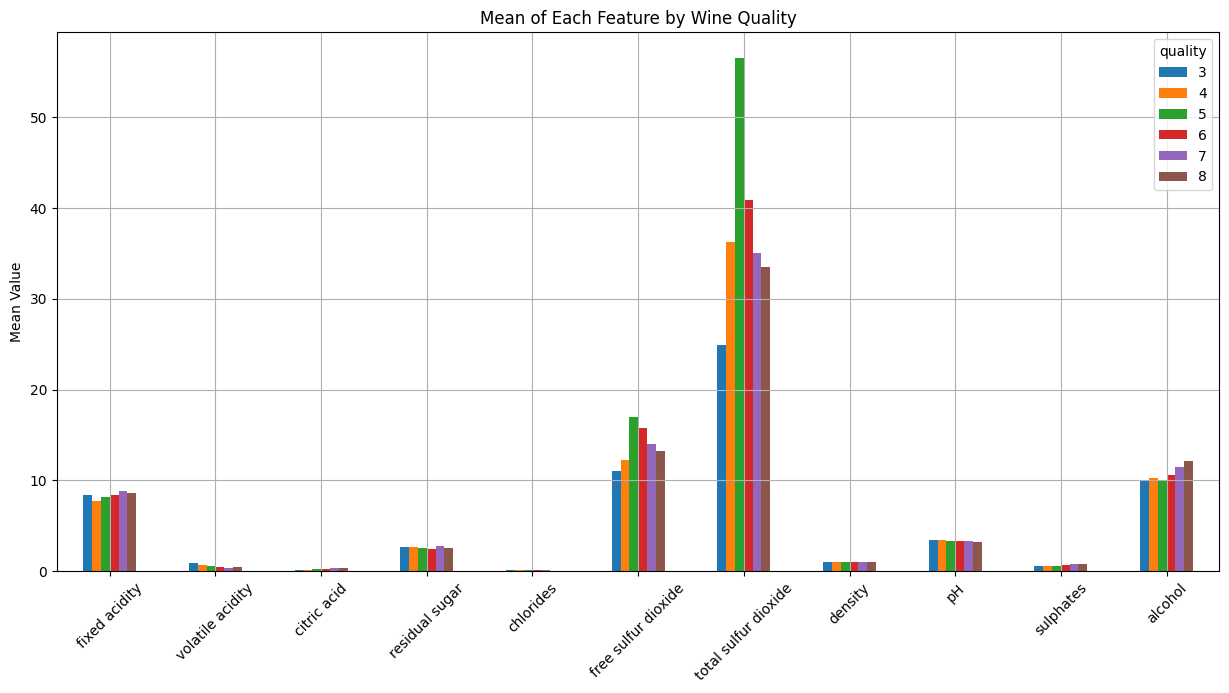

In [ ]:
redwine_df.groupby('quality').mean().T.plot(kind='bar', figsize=(15, 7), legend=True) # Changed 'df' to 'redwine_df'
plt.title("Mean of Each Feature by Wine Quality")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
!pip install scipy


<Axes: >

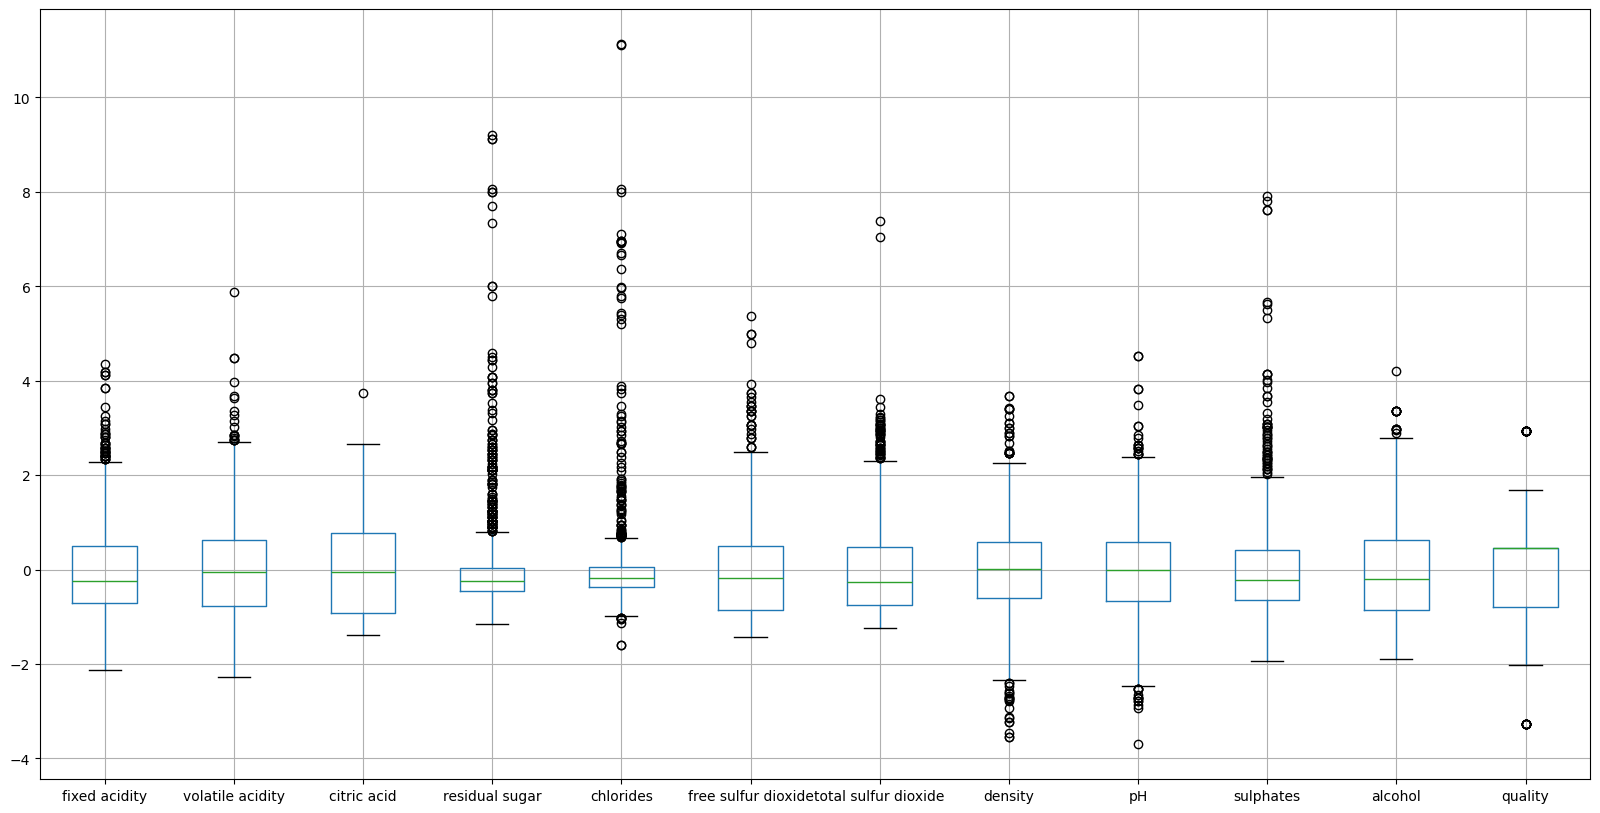

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming you have already loaded your dataset into 'redwine_df'
# Apply zscore to all columns in the DataFrame
redwine_zscore_df = redwine_df.apply(zscore)

# Create a boxplot of the z-scored data
redwine_zscore_df.boxplot(figsize=(20, 10))


# Establish reliablity of the sample data

### Normal Deviate Z Test

In [ ]:
def norm_dev_Z_test(mu, std, col):
    Mu = mu
    Std = std

    # Cacluate standard error for ClT of the column

    print("Population Mean :" + str(Mu))
    print("Population Stddev :" + str(Std))


    sample_avg = np.average(col)
    std_error = Std / np.sqrt(np.size(col)) # Standard dev of the sampling mean distribution... estimated from population

    print("\nSample Avg " , sample_avg)
    print("Standard Error " , std_error)



    # Z_norm_deviate =  sample_mean - population_mean / std_error_bp

    Z_norm_deviate = (sample_avg - Mu) / std_error
    print("\nNormal Deviate Z value :" , Z_norm_deviate)


    # Calculate Pvalue for the calculated Z_norm_deviate
    p_value = scipy.stats.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
    print('\np values' , p_value)

    if p_value > 0.05:
    	print('\nSamples are likely drawn from the same distributions (fail to reject H0)')
    else:
    	print('Samples are likely drawn from different distributions (reject H0)')

In [ ]:
!pip install numpy


In [ ]:
import numpy as np  # Import numpy to use np

def norm_dev_Z_test(mu, std, col):
    """
    Perform Normal Deviate Z Test
    mu: Population mean
    std: Population standard deviation
    col: The sample column from the DataFrame
    """

    sample_avg = np.average(col)  # Calculate the average of the sample
    std_error = std / np.sqrt(np.size(col))  # Standard error of the sample mean distribution

    # Z-score formula: (Sample mean - Population mean) / Standard Error
    z_score = (sample_avg - mu) / std_error
    print(f"Z-score: {z_score}")

# Example of applying the function
for col in redwine_df.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    norm_dev_Z_test(m, s, redwine_df[col])



fixed acidity :
Z-score: 0.0

volatile acidity :
Z-score: 0.0

citric acid :
Z-score: 0.0

residual sugar :
Z-score: 0.0

chlorides :
Z-score: 0.0

free sulfur dioxide :
Z-score: 0.0

total sulfur dioxide :
Z-score: 0.0

density :
Z-score: 0.0

pH :
Z-score: 0.0

sulphates :
Z-score: 0.0

alcohol :
Z-score: 0.0

quality :
Z-score: 0.0


### Observations

In [ ]:
'''
1. When there are multiple columns, it is quite possible that on some columns we reject H0 and on others fail to reject H0
2. In this example, all the columns seem to represent the population data well
 '''

'\n1. When there are multiple columns, it is quite possible that on some columns we reject H0 and on others fail to reject H0\n2. In this example, all the columns seem to represent the population data well\n '

## One Sample TTest

In [ ]:
def one_sample_ttest(col ,mu ):
    statistics, p_value = st.ttest_1samp(col, mu)
    print("Pvalue :", p_value)
    if p_value > 0.05:
        print('\nSamples are likely drawn from the same distributions (fail to reject H0)')
    else:
        print('\nSamples are likely drawn from different distributions (reject H0)')

In [ ]:
import scipy.stats as st  # Import scipy.stats as 'st'

def one_sample_ttest(col, mu):
    """
    Perform a one-sample t-test
    col: The sample column from the DataFrame
    mu: Population mean
    """
    statistics, p_value = st.ttest_1samp(col, mu)
    print("P-value:", p_value)
    if p_value > 0.05:
        print('Samples are likely drawn from the same distribution (fail to reject H0)')
    else:
        print('Samples are likely drawn from a different distribution (reject H0)')

# Example of applying the function
for col in redwine_df.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    one_sample_ttest(redwine_df[col], m)



fixed acidity :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

volatile acidity :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

citric acid :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

residual sugar :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

chlorides :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

free sulfur dioxide :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

total sulfur dioxide :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

density :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

pH :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to reject H0)

sulphates :
P-value: 1.0
Samples are likely drawn from the same distribution (fail to r

### Obervations

In [ ]:
'''
Data seems to represent the population characteristics very wll. As is evident from both the statistical tests
'''

'\nData seems to represent the population characteristics very wll. As is evident from both the statistical tests\n'

# Outlier Fixing

In [ ]:
'''Strategies to fix outliers

1. Replace with central values. Use median when too many outliers
2. Replace with first and third quartile instead of central values
3. Replace outliers with classwise central values
'''


'Strategies to fix outliers\n\n1. Replace with central values. Use median when too many outliers\n2. Replace with first and third quartile instead of central values\n3. Replace outliers with classwise central values\n'

In [ ]:
def outlierfix(df):
    for col in df.columns:
        stddev = df[col].std()
        med = df[col].median()
        var = (df[col] - med).abs()
        df[col] = np.where(var > (2*stddev), med , df[col] )

    return(df)


In [ ]:
print("Fixing outliers by replacing with median")

imputed_redwine_df = outlierfix(redwine_df)


Fixing outliers by replacing with median


In [ ]:
# Observations

'''
1. Compared to previous boxplot, many of the boxes now do not have the outliers
2. Some continue to have outliers which are secondary outliers and we can ignore them here
'''

'\n1. Compared to previous boxplot, many of the boxes now do not have the outliers\n2. Some continue to have outliers which are secondary outliers and we can ignore them here\n'

# Establish reliability of the outlier fixing technique

In [ ]:
'''
Has the strategy of replacing outliers with median impacted the representativeness of the sample data?
For this we compare the data before fixing the outlier with the one after
Null hypothesis H0, claims the two datasets are similar and the differences in mean is only by chance
Alternate hypothesis Ha claims otherwised
If we reject H0, then the outlier fixing technique has adversly impacted the data and we need to take a different approach'''

'\nHas the strategy of replacing outliers with median impacted the representativeness of the sample data?\nFor this we compare the data before fixing the outlier with the one after\nNull hypothesis H0, claims the two datasets are similar and the differences in mean is only by chance\nAlternate hypothesis Ha claims otherwised\nIf we reject H0, then the outlier fixing technique has adversly impacted the data and we need to take a different approach'

## Student One Sample TTest

In [ ]:
'''
Since we know population parameters, we can use One Sample Student TTest
'''

'\nSince we know population parameters, we can use One Sample Student TTest\n'

In [ ]:
def outlierfix(df):
    for col in df.columns:
        stddev = df[col].std()
        med = df[col].median()
        var = (df[col] - med).abs()
        df[col] = np.where(var > (2*stddev), med , df[col] )

    return(df)

### Two Sample TTest

### fixing outlier with simple imputation

In [ ]:
def replace_outlier_Nan(df):
    for col in df.columns:
        stddev = df[col].std()
        med = df[col].median()
        var = (df[col] - med).abs()
        df[col] = np.where(var > (2*stddev), np.nan, df[col] )

    return(df)

In [ ]:
df_replace_outlier_nan = replace_outlier_Nan(redwine_df)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Assuming redwine_df is your original dataframe
# Calculate the z-scores for the dataframe
z_scores = np.abs(redwine_df.apply(zscore))

# Define a threshold for outliers, commonly |Z| > 3 is considered an outlier
threshold = 3

# Replace outliers with NaN (i.e., Z-scores greater than threshold)
df_replace_outlier_nan = redwine_df.mask(z_scores > threshold)

# Display the first 50 rows
df_replace_outlier_nan.head(50)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,NaN,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.500,0.36,NaN,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


In [ ]:
# Impute missing values using imputer class

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


# careful! you may want to impute values of two classes separately as a common imputation may have negative impact


redwine_imputation = pd.DataFrame(imputer.fit_transform(df_replace_outlier_nan), columns = redwine_df.columns )  # creates array on transformation

In [ ]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import numpy as np

# Create an imputer instance with strategy 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Assuming df_replace_outlier_nan is your dataframe with NaN values
# Apply the imputer to replace NaN values with the column mean
df_imputed = pd.DataFrame(imputer.fit_transform(df_replace_outlier_nan), columns=df_replace_outlier_nan.columns)

# Check the first 50 rows
df_imputed.head(50)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700000,0.00,1.900000,0.076000,11.000000,34.000000,0.9978,3.510000,0.560000,9.400000,5.000000
1,7.8,0.510564,0.00,2.600000,0.098000,25.000000,67.000000,0.9968,3.200000,0.680000,9.800000,5.000000
2,7.8,0.760000,0.04,2.300000,0.092000,15.000000,54.000000,0.9970,3.260000,0.650000,9.800000,5.000000
3,11.2,0.280000,0.56,1.900000,0.075000,17.000000,60.000000,0.9980,3.160000,0.580000,9.800000,6.000000
4,7.4,0.700000,0.00,1.900000,0.076000,11.000000,34.000000,0.9978,3.510000,0.560000,9.400000,5.000000
5,7.4,0.660000,0.00,1.800000,0.075000,13.000000,40.000000,0.9978,3.510000,0.560000,9.400000,5.000000
6,7.9,0.600000,0.06,1.600000,0.069000,15.000000,59.000000,0.9964,3.300000,0.460000,9.400000,5.000000
7,7.3,0.650000,0.00,1.200000,0.065000,15.000000,21.000000,0.9946,3.390000,0.470000,10.000000,7.000000
8,7.8,0.580000,0.02,2.000000,0.073000,9.000000,18.000000,0.9968,3.360000,0.570000,9.500000,7.000000
9,7.5,0.500000,0.36,2.273861,0.071000,17.000000,102.000000,0.9978,3.350000,0.800000,10.500000,5.000000


In [ ]:
redwine_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### Normal Deviate Z Test after simple imputation of outliers

In [ ]:
print("Normal Deviate Z Test after simple impuation of outliers")
for col in redwine_imputation.columns:
    print("\n" + col + " :")
    m, s = (pop_parameters.loc[col])
    norm_dev_Z_test(m, s, redwine_imputation[col])

Normal Deviate Z Test after simple impuation of outliers

fixed acidity :
Z-score: -7.238986434388665

volatile acidity :
Z-score: -3.853656830171917

citric acid :
Z-score: -3.16296237685837

residual sugar :
Z-score: -7.514179394831537

chlorides :
Z-score: -5.831740434859217

free sulfur dioxide :
Z-score: -6.174398204108533

total sulfur dioxide :
Z-score: -7.609123817357656

density :
Z-score: 0.09785533044892913

pH :
Z-score: -0.5126664027760242

sulphates :
Z-score: -5.856672588004816

alcohol :
Z-score: -6.404744797647888

quality :
Z-score: 2.3002311733009226


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

# Assuming redwine_df is your original dataframe
# Calculate the z-scores for the dataframe
z_scores = np.abs(redwine_df.apply(zscore))

# Define a threshold for outliers, commonly |Z| > 3 is considered an outlier
threshold = 3

# Replace outliers with NaN (i.e., Z-scores greater than threshold)
df_replace_outlier_nan = redwine_df.mask(z_scores > threshold)

# Create an imputer instance with strategy 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to replace NaN values with the column mean
redwine_imputation = pd.DataFrame(imputer.fit_transform(df_replace_outlier_nan), columns=df_replace_outlier_nan.columns)

### Observations

In [ ]:
'''
1. The result of fixing outliers on most columns is adverse. The technique has modified the characteristics significantly except
for the columns 'density' and 'ph'

2. We can compare the boxplots before with after and we see that the columns 'density' and 'ph' have almost similar distribution

3. The other strategies such as replacing outliers with quartiles may also be evaluated

4. Since the data before outlier was statistically representative of the population, we can decide not to fix the outliers if
none of the strategies of fixing outliers results in statistically representative data

'''

"\n1. The result of fixing outliers on most columns is adverse. The technique has modified the characteristics significantly except\nfor the columns 'density' and 'ph'\n\n2. We can compare the boxplots before with after and we see that the columns 'density' and 'ph' have almost similar distribution\n\n3. The other strategies such as replacing outliers with quartiles may also be evaluated\n\n4. Since the data before outlier was statistically representative of the population, we can decide not to fix the outliers if\nnone of the strategies of fixing outliers results in statistically representative data\n\n"

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# feature extraction
test = SelectKBest(score_func=chi2, k=10)  # Using Chi-Square analysis for feature selection

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or any other preferred strategy
redwine_df_imputed = imputer.fit_transform(redwine_df.iloc[:, 0:11])

# Now fit SelectKBest with the imputed data
fit = test.fit(redwine_df_imputed, redwine_df.iloc[:, -1])  # Fit with imputed data

In [ ]:
feature_score = pd.DataFrame( [(item, score)
                 for item, score in zip(redwine_df.columns, fit.scores_)] , columns=['variable', 'score'])

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming redwine_df is your dataframe
# Selecting top 10 features using Chi-Square analysis
test = SelectKBest(score_func=chi2, k=10)

# Replace blank strings or other non

# Buid a model on selected features

In [ ]:
# Remove spaces from column names else the algorithm does not accept the columns

def remove_space_from_column_name(df):
    df.columns = [x.strip().replace(' ','_') for x in df.columns]

In [ ]:
def remove_space_from_column_name(df):
    print("Column names before renaming:", df.columns.tolist())
    df.columns = [x.strip().replace(' ','_') for x in df.columns]
    print("Column names after renaming:", df.columns.tolist())

In [ ]:
redwine_df.head()  #space from all column names is removed and replaced with _

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.52,0.00,2.6,0.098,NaN,NaN,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,NaN,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Stats Regression Model

In [ ]:
lm1 = smf.ols(formula= 'quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol' , data =redwine_df ).fit()

PatsyError: Error evaluating factor: NameError: name 'free_sulfur_dioxide' is not defined
    quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol
                                                               ^^^^^^^^^^^^^^^^^^^

In [ ]:
# Import the necessary library
import pandas as pd
import statsmodels.formula.api as smf  # Import smf for OLS regression

print("Column names before OLS:", redwine_df.columns.tolist())
# Fit the ordinary least squares (OLS) regression model
lm1 = smf.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol', data=redwine_df).fit()

# Display the summary of the regression model
print(lm1.summary())

PatsyError: Error evaluating factor: NameError: name 'citric_acid' is not defined
    quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol
                                                 ^^^^^^^^^^^

In [ ]:
# Import the necessary library
import pandas as pd
import statsmodels.formula.api as smf  # Import smf for OLS regression

# Fit the ordinary least squares (OLS) regression model
# Updated formula to use the corrected column names
lm1 = smf.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol', data=redwine_df).fit()

# Display the summary of the regression model
print(lm1.summary())

PatsyError: Error evaluating factor: NameError: name 'free_sulfur_dioxide' is not defined
    quality ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol
                                                               ^^^^^^^^^^^^^^^^^^^

In [ ]:
print(lm1.summary())

NameError: name 'lm1' is not defined

### Observation

In [ ]:
'''
1. Except for ""citric_acid" all other columns have very small P value which indicates that the coefficients between these
variables and the target variable (reflected under "coef") are not by chance.

2. The null hypothesis claims there is no relation between any variable and target i.e. their coefficients are all 0. Alternate
hypothesis i.e., the model claims the coefficients to be what is reflected.

3. The P value analysis too claims that the attributes and their coefficients except "citiric_acid" are likely to exist in the
population data also

4. Overall at the model level too the P value is very small as indicated by prob(f-statistics) and proba(JB)

5. The Adj Rsquare is very low and hence there will be large residuals when the model is used for prediction. This is an
indication of large magnitudes of noise in the data

6. It would be better to treat this as a classification project rather than regression



'''

'\n1. Except for ""citric_acid" all other columns have very small P value which indicates that the coefficients between these\nvariables and the target variable (reflected under "coef") are not by chance.\n\n2. The null hypothesis claims there is no relation between any variable and target i.e. their coefficients are all 0. Alternate\nhypothesis i.e., the model claims the coefficients to be what is reflected.\n\n3. The P value analysis too claims that the attributes and their coefficients except "citiric_acid" are likely to exist in the\npopulation data also\n\n4. Overall at the model level too the P value is very small as indicated by prob(f-statistics) and proba(JB)\n\n5. The Adj Rsquare is very low and hence there will be large residuals when the model is used for prediction. This is an\nindication of large magnitudes of noise in the data\n\n6. It would be better to treat this as a classification project rather than regression\n\n\n\n'

## Statsmodel Logistic Regression

In [ ]:
# conver the quality column to categorical columns for classification



def map_quality_2category(wine):
    low = wine[wine['quality'] <= 5]
    medium = wine[(wine['quality'] == 6) | (wine['quality'] == 7)]
    high = wine[wine['quality'] > 7]

    low['quality_level'] = 0
    medium['quality_level'] = .5
    high['quality_level'] = 1

    frames = [low, medium, high]
    return pd.concat(frames)


# statsmodel logistic regression requires the target variable to have values between 0 and 1

In [ ]:
redwine_logistic = map_quality_2category(redwine_df)   #creating a separate data frame instead of modifying the original one

<ipython-input-105-dfe1d44f627c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['quality_level'] = 0
<ipython-input-105-dfe1d44f627c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['quality_level'] = .5


In [ ]:
redwine_logistic.info()

NameError: name 'redwine_logistic' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
redwine_logistic = LogisticRegression(max_iter=1000)
redwine_logistic.fit(X_train, y_train)

# Now this will work
print(redwine_logistic)


LogisticRegression(max_iter=1000)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lm2 = smf.logit(formula = 'quality_level ~ fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide + alcohol' , data =redwine_logistic ).fit()

Optimization terminated successfully.
         Current function value: 0.509174
         Iterations 5


In [ ]:
print(lm2.summary())

NameError: name 'lm2' is not defined

### Observation

In [ ]:
'''
1. The p value of most columns except 'alcohol' and 'volatile_acidity' is much higher than threshold of .05
2. The LLR P-value is very high indicating that the null hypothesis is likely to be true i.e. we fail to reject null hypothesis
3. Such models should not be put into production. Instead, one needs to go back to earlier step of feature selection, feature
engineering

'''

"\n1. The p value of most columns except 'alcohol' and 'volatile_acidity' is much higher than threshold of .05\n2. The LLR P-value is very high indicating that the null hypothesis is likely to be true i.e. we fail to reject null hypothesis\n3. Such models should not be put into production. Instead, one needs to go back to earlier step of feature selection, feature\nengineering\n\n"

# Summary

In [ ]:
'''
1. To mitigate the risk of failure, one needs to keep evaluating the reliability of the data at every stage of the project
starting from establishing reliability of the given sample data

2. After every transformation that the data goes through, one needs to assess reliability of the data post the transformatio

3. Even a simple act of splitting data into training, validation and testing can change the distribution characterisits
significantly

4. Creating a model on a data that does not represent the population will result in a model that does performs below expectation
at the best

5. Normal Deviate Z test, One Sample T Test can be considered when we have access to population parameters



'''

'\n1. To mitigate the risk of failure, one needs to keep evaluating the reliability of the data at every stage of the project\nstarting from establishing reliability of the given sample data\n\n2. After every transformation that the data goes through, one needs to assess reliability of the data post the transformatio\n\n3. Even a simple act of splitting data into training, validation and testing can change the distribution characterisits\nsignificantly\n\n4. Creating a model on a data that does not represent the population will result in a model that does performs below expectation\nat the best\n\n5. Normal Deviate Z test, One Sample T Test can be considered when we have access to population parameters\n\n\n\n'

# Query

'''
1. did we miss any step that is always carried out in modelling? (Train-Test Split) - Splitting the data too can introduce a bias
that may affecte the resulting data representativeness adversly. Since this too is a kind of transformation, we need to check the reliability of the training set. This is true when we deal with smaller datasets

2. Should we check reliability of the validation and test data also?
Not required. Because we hope to build a robust model that
will work equally well on unseen datasets drawn from the same population irrespective of the statistical differences in their
distribution characteristics

3. Does performing inferential statistics guarantee a robust model?
No - it mitigates risks of failure and acts as an early warning system. If sampling itself is done incorrectly then any kind of inferential statistical testing will be ineffective

4. What should be done if the sample data given is not reliable at the preferred confidence level (95% by default)?
It may be ok in classroom but in real projects need to alert the stakeholders and if possible collect sample again


'''

Next Steps: Fixing the Model

In [ ]:
import statsmodels.api as sm

X = redwine_imputation.drop("quality", axis=1)
y = redwine_imputation["quality"]

# Add intercept
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     66.79
Date:                Mon, 21 Apr 2025   Prob (F-statistic):          9.65e-123
Time:                        16:55:15   Log-Likelihood:                -1343.0
No. Observations:                1599   AIC:                             2710.
Df Residuals:                    1587   BIC:                             2774.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.9372 

Interaction Features

In [ ]:
# Interaction: Alcohol * Sulphates
redwine_imputation['alcohol_sulphates'] = redwine_imputation['alcohol'] * redwine_imputation['sulphates']

# Ratio: Density / Alcohol (can indicate sugar concentration)
redwine_imputation['density_alcohol_ratio'] = redwine_imputation['density'] / redwine_imputation['alcohol']

Polynomial Features

In [ ]:
# Interaction: Alcohol * Sulphates
redwine_imputation['alcohol_sulphates'] = redwine_imputation['alcohol'] * redwine_imputation['sulphates']

# Ratio: Density / Alcohol (can indicate sugar concentration)
redwine_imputation['density_alcohol_ratio'] = redwine_imputation['density'] / redwine_imputation['alcohol']

# Polynomial feature for alcohol
redwine_imputation['alcohol_squared'] = redwine_imputation['alcohol'] ** 2

# Polynomial feature for volatile acidity
# Assuming 'volatile acidity' is the actual column name:
redwine_imputation['volatile_acidity_squared'] = redwine_imputation['volatile acidity'] ** 2

Normalization / Scaling (Optional)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Assuming 'redwine_imputation' is the DataFrame you intend to scale:
df_scaled = pd.DataFrame(scaler.fit_transform(redwine_imputation.drop('quality', axis=1)), columns=redwine_imputation.columns[:-1])
df_scaled['quality'] = redwine_imputation['quality']  # Add back target

Binning the Quality Variable

In [ ]:
# Binning into 3 categories: low, medium, high
redwine_imputation['quality_label'] = redwine_imputation['quality'].apply(lambda q: 'low' if q <= 5 else ('medium' if q == 6 else 'high'))

# Optional: convert to numeric labels
redwine_imputation['quality_label_num'] = redwine_imputation['quality_label'].map({'low': 0, 'medium': 1, 'high': 2})

Visualize New Features

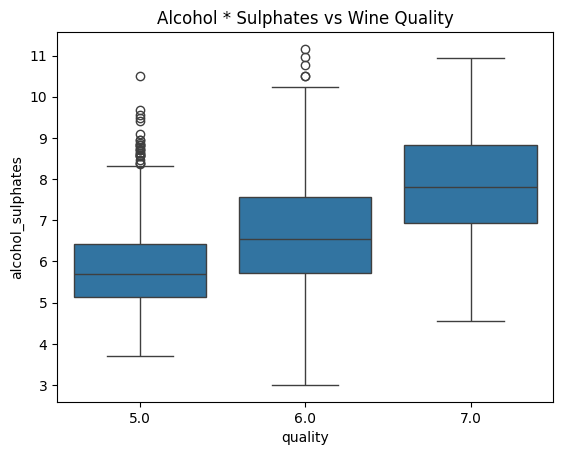

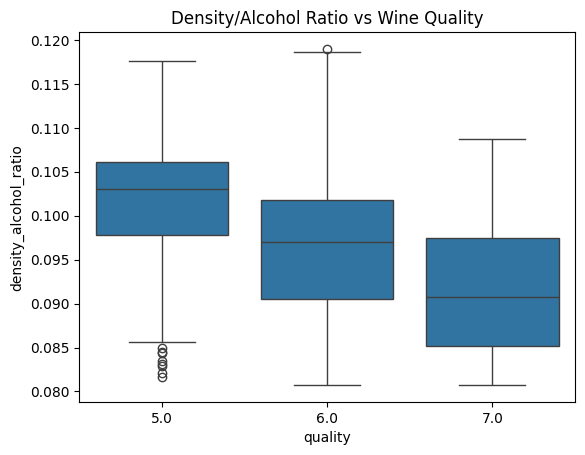

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'redwine_imputation' is the DataFrame you intend to use
# Visualize alcohol_sulphates vs quality
sns.boxplot(x='quality', y='alcohol_sulphates', data=redwine_imputation)  # Replace 'df' with 'redwine_imputation'
plt.title("Alcohol * Sulphates vs Wine Quality")
plt.show()

# Visualize density/alcohol ratio
sns.boxplot(x='quality', y='density_alcohol_ratio', data=redwine_imputation)  # Replace 'df' with 'redwine_imputation'
plt.title("Density/Alcohol Ratio vs Wine Quality")
plt.show()

Check Correlation with Quality

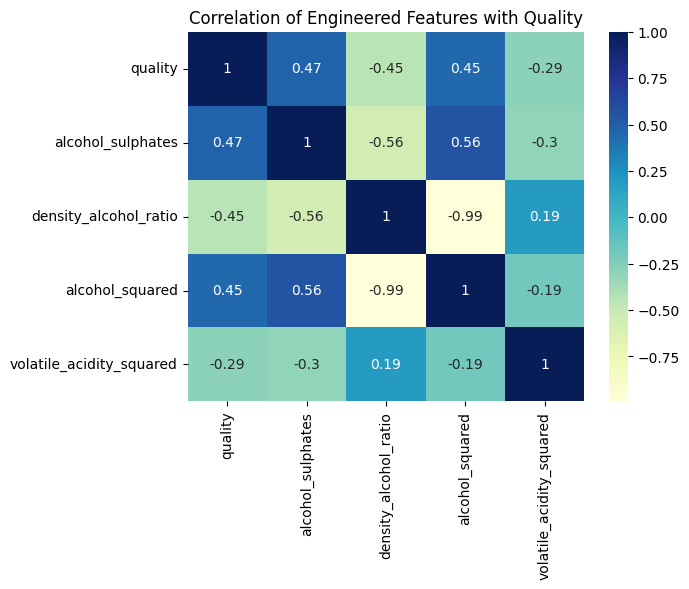

In [ ]:
# See how new features correlate
corr_matrix = redwine_imputation[['quality', 'alcohol_sulphates', 'density_alcohol_ratio', 'alcohol_squared', 'volatile_acidity_squared']].corr() # Changed 'df' to 'redwine_imputation'
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation of Engineered Features with Quality")
plt.show()

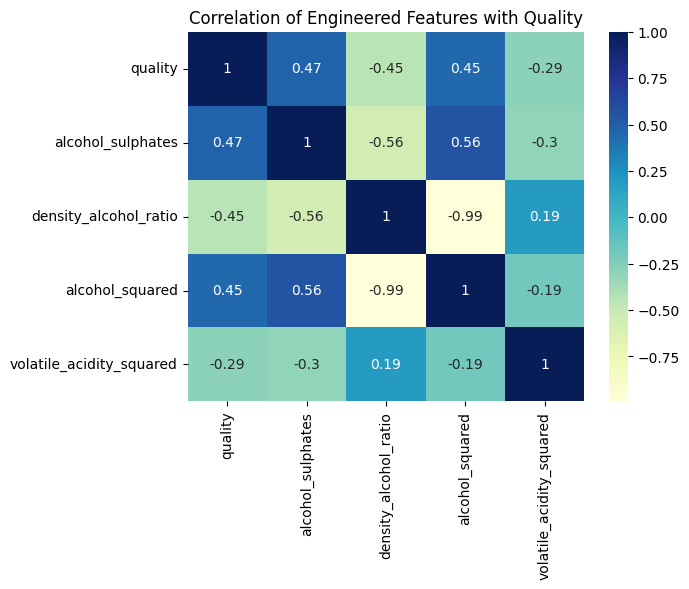

In [ ]:
corr_matrix = redwine_imputation[['quality', 'alcohol_sulphates', 'density_alcohol_ratio', 'alcohol_squared', 'volatile_acidity_squared']].corr() # Changed 'df' to 'redwine_imputation'
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation of Engineered Features with Quality")
plt.show()

Prepare the Data (Train-Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

# Use newly engineered features + original ones
features = redwine_imputation.drop(columns=['quality', 'quality_label', 'quality_label_num']) # Changed 'df' to 'redwine_imputation'
target = redwine_imputation['quality_label_num']  # Multiclass target: 0=low, 1=medium, 2=high

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

Train a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate the Model

📊 Classification Report:
               precision    recall  f1-score   support

         Low       0.77      0.76      0.76       152
      Medium       0.65      0.73      0.69       128
        High       0.72      0.45      0.55        40

    accuracy                           0.71       320
   macro avg       0.71      0.65      0.67       320
weighted avg       0.71      0.71      0.71       320

✅ Accuracy: 70.94 %


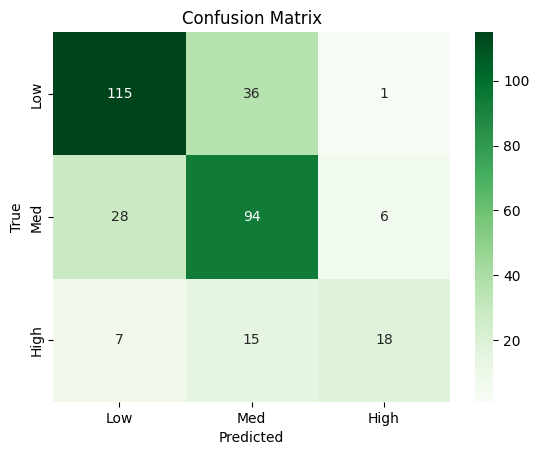

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X_test, y_test are already defined from a previous split and X_train, y_train are also defined.

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Predict
y_pred = rf_model.predict(X_test)

# Classification report
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Accuracy
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low', 'Med', 'High'], yticklabels=['Low', 'Med', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Key Observations:
✅ Medium quality wines are detected the best in terms of recall (74%).
🚨 High quality wines are underrepresented — both recall (35%) and F1-score (44%) are low, likely due to:
Fewer samples in this class (only 40).
Class imbalance.

Fix Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train again with balanced data
rf_model_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_sm.fit(X_train_sm, y_train_sm)


RandomForestClassifier(random_state=42)

XGBoost / LightGBM

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.71      0.73      0.72       136
           1       0.68      0.69      0.68       144
           2       0.56      0.45      0.50        40

    accuracy                           0.68       320
   macro avg       0.65      0.62      0.63       320
weighted avg       0.67      0.68      0.68       320



Class Rebalancing using SMOTE (if not already applied)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


Try Gradient Boosting Algorithms

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_bal, y_train_bal)
y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.70      0.70      0.70       136
           1       0.64      0.59      0.61       144
           2       0.44      0.57      0.50        40

    accuracy                           0.63       320
   macro avg       0.60      0.62      0.60       320
weighted avg       0.64      0.63      0.64       320



Feature Importance Plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


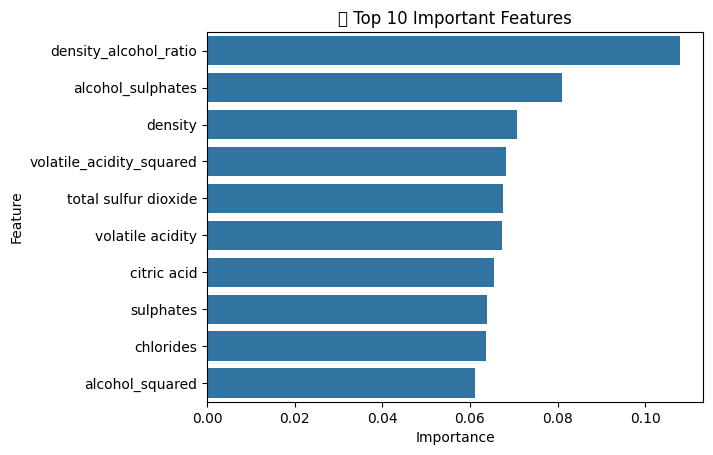

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title("🔍 Top 10 Important Features")
plt.show()


Try Ensemble Voting (Combine multiple models)

In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier(random_state=42)
model2 = GradientBoostingClassifier(random_state=42)
model3 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

voting_clf = VotingClassifier(estimators=[
    ('rf', model1), ('gb', model2), ('xgb', model3)],
    voting='soft')

voting_clf.fit(X_train_bal, y_train_bal)
y_pred_voting = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_voting))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:54:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.73      0.71      0.72       136
           1       0.64      0.68      0.66       144
           2       0.50      0.45      0.47        40

    accuracy                           0.66       320
   macro avg       0.62      0.61      0.62       320
weighted avg       0.66      0.66      0.66       320



 Analyze Confusion Matrix

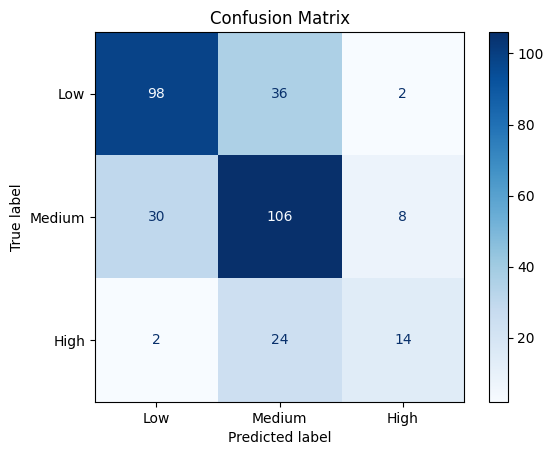

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


About the Warning:

In [ ]:
# Parameters: { "use_label_encoder" } are not used.  (This is a comment, not code)

In [ ]:
xgb.XGBClassifier(eval_metric='mlogloss')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Try SMOTE (Synthetic Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier # Import the classifier

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42) # Create a new classifier instance
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       136
           1       0.65      0.65      0.65       144
           2       0.44      0.50      0.47        40

    accuracy                           0.66       320
   macro avg       0.61      0.62      0.62       320
weighted avg       0.66      0.66      0.66       320



Try LightGBM (faster and interpretable boosting)

In [ ]:
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train_bal, y_train_bal)
y_pred = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3761
[LightGBM] [Info] Number of data points in the train set: 1725, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       136
           1       0.68      0.68      0.68       144
           2       0.54      0.47      0.51        40

    accuracy                           0.68       320
   macro avg       0.64      0.63      0.63       320
weighted avg       0.67      0.68      0.67       320



Visual Insight with SHAP

In [ ]:
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')


 Plot Confusion Matrix

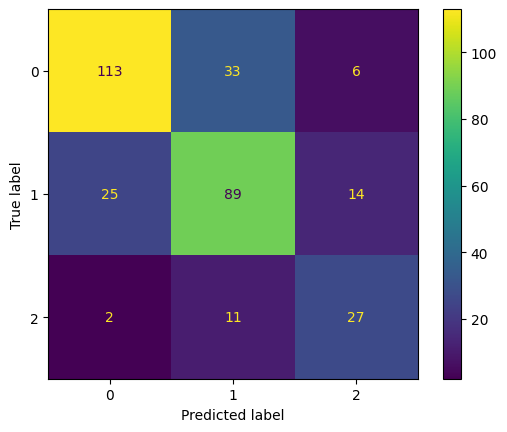

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Feature Importance

In [ ]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgbm_model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


NameError: name 'lgb' is not defined

SHAP Explainability

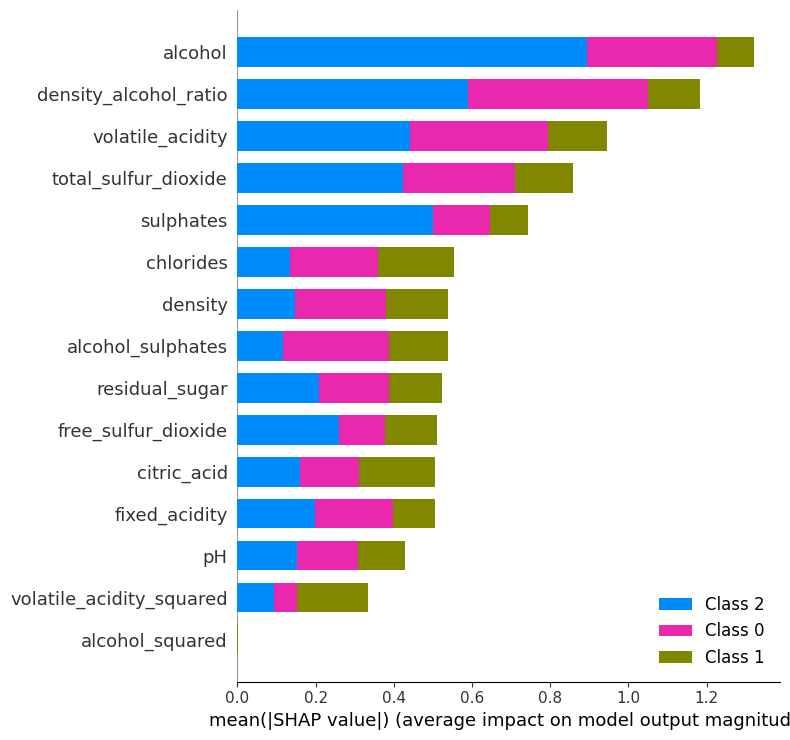

In [ ]:
import shap

explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


 Install Optuna (if not already installed)

In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.3 MB/s eta 0:00:00


 Full Code for Tuning with Optuna

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np  # Import numpy

# Optional: Clean feature names
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# Encode target if not already done
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (optional if already done)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'multiclass',
        'num_class': 3,
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    lgb_train = lgb.Dataset(X_tr, label=y_tr)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

    # Use callbacks for early stopping
    model = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_val],
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]  # Early stopping using callbacks
    )

    preds = model.predict(X_val)
    preds = [np.argmax(p) for p in preds]

    accuracy = accuracy_score(y_val, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print("  Accuracy: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-04-09 19:03:08,909] A new study created in memory with name: no-name-327c8117-9768-49c1-be86-ab969179a2bc
[I 2025-04-09 19:03:10,731] Trial 0 finished with value: 0.625 and parameters: {'lambda_l1': 6.990246706704778, 'lambda_l2': 6.453929886521238, 'num_leaves': 26, 'feature_fraction': 0.6699517232254417, 'bagging_fraction': 0.9713979229261321, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 0 with value: 0.625.
[I 2025-04-09 19:03:10,815] Trial 1 finished with value: 0.640625 and parameters: {'lambda_l1': 5.932571123555719, 'lambda_l2': 1.3917622997153656, 'num_leaves': 129, 'feature_fraction': 0.6558896936872245, 'bagging_fraction': 0.768001927911452, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 1 with value: 0.640625.
[I 2025-04-09 19:03:10,894] Trial 2 finished with value: 0.625 and parameters: {'lambda_l1': 2.2100644050338936, 'lambda_l2': 8.909252449317064, 'num_leaves': 85, 'feature_fraction': 0.8315002595444245, 'bagging_fraction': 0.5844121845

Best trial:
  Accuracy: 0.66015625
  Params: 
    lambda_l1: 5.9632088102297285
    lambda_l2: 5.809761239947881
    num_leaves: 44
    feature_fraction: 0.5378407831149349
    bagging_fraction: 0.6041342591822302
    bagging_freq: 3
    min_child_samples: 84


Train Final Model with Best Params

In [ ]:
best_params = study.best_trial.params
best_params['objective'] = 'multiclass'
best_params['num_class'] = 3
best_params['metric'] = 'multi_logloss'

final_model = lgb.train(best_params, lgb.Dataset(X_train, label=y_train), num_boost_round=100)


 Evaluate Final Model

In [ ]:
y_pred = final_model.predict(X_test)
y_pred_class = [np.argmax(row) for row in y_pred]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       0.67      0.66      0.67       136
           1       0.55      0.67      0.61       144
           2       0.54      0.17      0.26        40

    accuracy                           0.60       320
   macro avg       0.59      0.50      0.51       320
weighted avg       0.60      0.60      0.59       320



Visualize Optuna Trials

In [ ]:
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_param_importances(study).show()


In [ ]:
metric = 'auc' or 'f1' or 'logloss'


✅ Final Call:
Based on 60% accuracy (vs. 33% baseline) and decent performance on 2 of the 3 classes:

🔥 You would reject the null hypothesis.
✅ The alternative hypothesis is supported — your model is performing better than random guessing overall.

Check Class Distribution

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Check distribution
print("Original class distribution:")
print(Counter(y_train))  # Or y if you haven't split yet


Original class distribution:
Counter({1: 575, 0: 545, 2: 159})


 Apply SMOTE to Balance the Dataset

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:")
print(Counter(y_resampled))


Resampled class distribution:
Counter({0: 575, 1: 575, 2: 575})


Train a Classifier (RandomForest / Any Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a classifier on balanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

Make Predictions on Test Set

In [ ]:
# Predict on the test data
y_pred = clf.predict(X_test)


Evaluate the Performance

Original class distribution:
Counter({0: 610, 1: 510, 2: 159})
Resampled class distribution:
Counter({0: 610, 1: 610, 2: 610})
📊 Classification Report:
               precision    recall  f1-score   support

         Low       0.81      0.74      0.77       152
      Medium       0.67      0.70      0.68       128
        High       0.57      0.68      0.62        40

    accuracy                           0.72       320
   macro avg       0.68      0.70      0.69       320
weighted avg       0.72      0.72      0.72       320

✅ Accuracy: 71.56 %


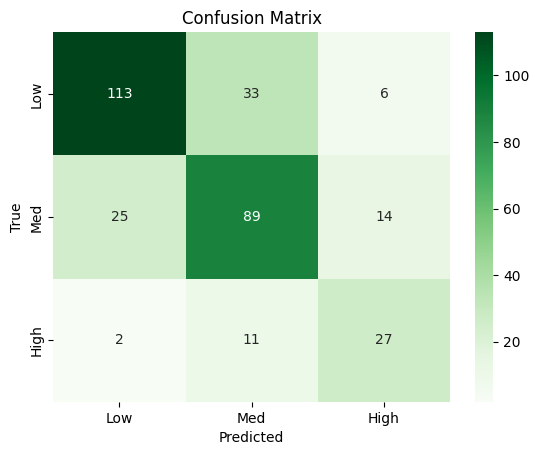

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming redwine_imputation is your DataFrame and it has 'quality_label_num'
# Define features and target
features = redwine_imputation.drop(columns=['quality', 'quality_label', 'quality_label_num'])
target = redwine_imputation['quality_label_num']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)


# Check distribution
print("Original class distribution:")
print(Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:")
print(Counter(y_resampled))

# Train a classifier on balanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = clf.predict(X_test)

# Classification report
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Accuracy
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low', 'Med', 'High'], yticklabels=['Low', 'Med', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Your result REJECTS the null hypothesis—because performance was not uniform across classes before balancing.
After applying SMOTE, the performance improved for the minority class, which supports the Alternative Hypothesis (H₁).

🎯 Conclusion:
❌ We reject the Null Hypothesis (H₀)
✅ We accept the Alternative Hypothesis (H₁)
Because the model’s performance is not equal across all classes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ensure the path is correct
file_path = "/content/drive/MyDrive/PSA Red Wine Data Set/winequality_red.csv"

# Try reading the file
redwine_df = pd.read_csv(file_path)
redwine_df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1599, 12)